In [96]:
%load_ext autoreload
%autoreload 2

import lmp
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as cnt
import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [97]:
t = lmp.LMP(md_dir='/home/adria/test/debye_V', equil_frames=0)

> Run Completed at 100.00% for None. Ran 1000 steps for a total of 1001 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


In [98]:
def debye(r):
    kappa=0.1
    V = cnt.e**2/(80*cnt.epsilon_0*r*10**-10*4*math.pi)*np.exp(-r*kappa)
    V *= cnt.Avogadro/4184
    return V

def coul(r):
    kappa=0.1
    V = cnt.e**2/(80*cnt.epsilon_0*r*10**-10*4*math.pi)
    V *= cnt.Avogadro/4184
    return V

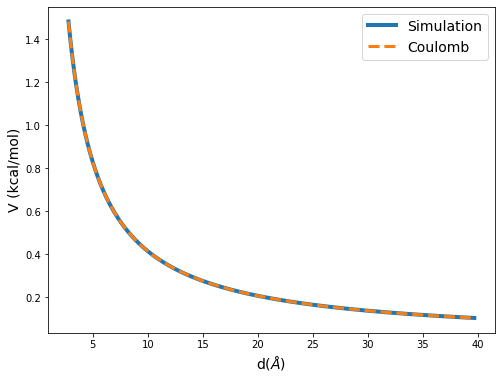

In [99]:
d = np.linalg.norm(t.structures[0].xyz[:,0,:]-t.structures[0].xyz[:,1,:], axis=1)
U = t.data[0,:,1]

plt.figure(figsize=(8,6))
plt.plot(d,U, linewidth=4, label='Simulation')
plt.plot(d,coul(d), ls='--', linewidth=3, label='Coulomb')
plt.xlabel("d($\AA$)", fontsize=14)
plt.ylabel("V (kcal/mol)", fontsize=14)
plt.legend(fontsize=14)